In [ ]:
import pandas as pd
from google.colab import drive

# Cargar el conjunto de datos
df = pd.read_csv('/content/cardio_train - cardio_train.csv')
print(df.head())




     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:

columns_names = df.columns.values
print(columns_names)

['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio']


In [ ]:
# Comprobación de missing data
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
print("Existen", df.size, "elementos")

Existen 840000 elementos


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las características que deseas normalizar
features_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# Aplicar la normalización solo a las características seleccionadas
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print(df.head())

        age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0  0.588076       2  0.579487  0.273684  0.016079  0.013550          0.0   
1  0.730159       1  0.517949  0.394737  0.017934  0.014453          1.0   
2  0.624003       1  0.564103  0.284211  0.017316  0.012647          1.0   
3  0.528455       2  0.584615  0.378947  0.018553  0.015357          0.0   
4  0.516918       1  0.517949  0.242105  0.015461  0.011743          0.0   

   gluc  smoke  alco  active  cardio  
0   0.0      0     0       1       0  
1   0.0      0     0       1       1  
2   0.0      0     0       0       1  
3   0.0      0     0       1       1  
4   0.0      0     0       0       0  


In [ ]:
# Lista de columnas categóricas para aplicar one-hot encoding
columnas_categoricas = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# Aplicar one-hot encoding a las columnas categóricas
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar el resultado
print(df.iloc[:20])

         age  gender  smoke  alco  active  cardio  \
0   0.588076       2      0     0       1       0   
1   0.730159       1      0     0       1       1   
2   0.624003       1      0     0       0       1   
3   0.528455       2      0     0       1       1   
4   0.516918       1      0     0       0       0   
5   0.860705       1      0     0       0       0   
6   0.876113       1      0     0       1       0   
7   0.912582       2      0     0       1       1   
8   0.531940       1      0     0       1       0   
9   0.699652       1      0     0       0       0   
10  0.908401       1      0     0       1       0   
11  0.620751       2      0     0       1       0   
12  0.309175       2      0     0       0       0   
13  0.697716       1      0     0       1       0   
14  0.289121       2      1     1       1       0   
15  0.463337       2      0     0       0       1   
16  0.812853       1      0     0       0       0   
17  0.460627       1      0     0       1     

In [ ]:
# Análisis de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame que contenga solo las filas con cardiopatías
df_with_heart_disease = df[df['cardio'] == 1]

# Contar la cantidad de hombres y mujeres con cardiopatías
gender_counts = df_with_heart_disease['gender'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Personalizar el gráfico
plt.title('Cantidad de Hombres y Mujeres con Cardiopatías')
plt.xlabel('Género (0 = Mujeres, 1 = Hombres)')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Mujeres', 'Hombres'])

# Mostrar el gráfico
plt.show()

NameError: ignored

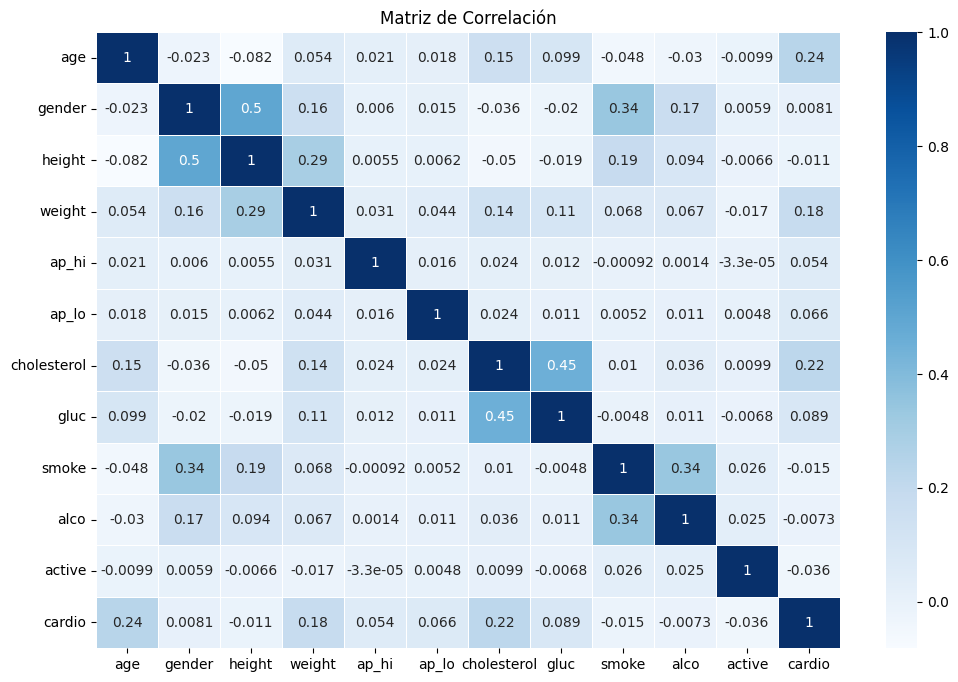

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

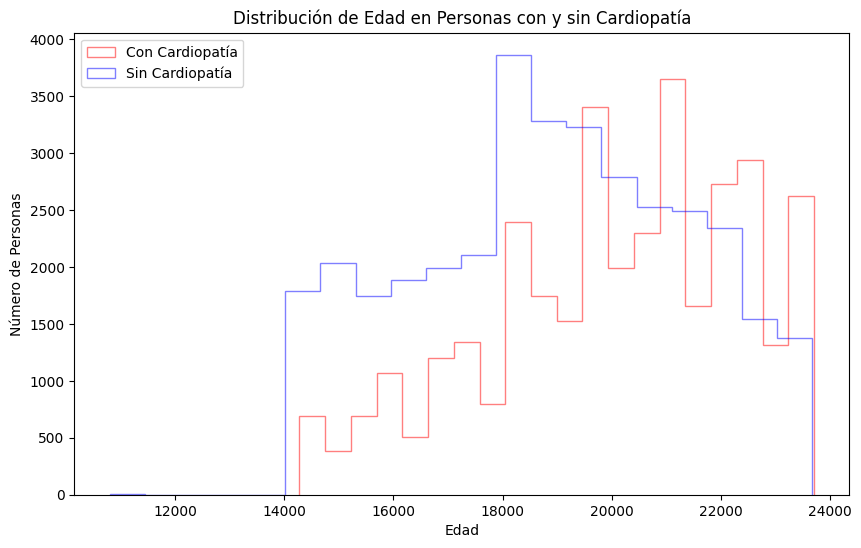

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener dos conjuntos de datos separados:
# uno para personas con cardiopatías (target=1) y otro para personas sin cardiopatías (target=0)
with_cardio = df[df['cardio'] == 1]
without_cardio = df[df['cardio'] == 0]

# Crear histogramas para ambas categorías
plt.figure(figsize=(10, 6))
plt.hist(with_cardio['age'], bins=20, alpha=0.5, label='Con Cardiopatía', color='red', histtype='step')
plt.hist(without_cardio['age'], bins=20, alpha=0.5, label='Sin Cardiopatía', color='blue', histtype='step')

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Número de Personas')
plt.title('Distribución de Edad en Personas con y sin Cardiopatía')
plt.legend()

# Mostrar el histograma
plt.show()